# Ian Sleep Project : tracking deep sleep

Project outline

* Objective : for my personal understanding of deep sleep, its variance and its predictors. As a bit of a sleep nerd, I want to know what factors influence my deep sleep, so that I can best optimise my life around maximising deep sleep. 

* Rationale/ Incentive for project : have always been interested in sleep since a young age. Even in high school, where the pressures of juggling extra cirricular activities such as sports and academic workload nudged many of my peers into developing poor sleep habits or sleeping less, I have always prioritised sleep. 

I am highly sensitive to sleep, often finding myself deeply affected in terms of mood, motivation and focus whenever I fail to get enough hours. Although I have been able to mitigate that in recent times by simply not thinking too much about the amount of sleep I have gotten if I failed to sleep enough the night before (psychological/placebo effect), this is still an area I would want to optimise in order to not lose out on too many happier and productive days. 

* Data: 

    * Outcome variable : Deep sleep (minutes)

    * Factors considered 
        1. Exercise and calories burnt 
        2. Alcohol
        3. Gaming 
        4. Caffeine
        5. Eating before sleeping (personal addiction)

* Data collection methods 
    * Deep sleep amount: AutoSleep app on Apple Watch SE (occasionally cross checked against Health app)
    * Exercise and calories burnt: Activity/Fitness/Health app on Apple Watch SE and iPhone 
    * Coffee: conversion to caffeine in mg is tricky due to extraction/brewing method. Currently mainly using pourover with V60, and due to variations in pour methods it is hard to pinpoint a value for the amount of caffeine. 
    * Gaming and alcohol: currently for simplicity, capturing the rough amount of alcohol for my personal taste/tolerance. Unlikely to be generalised to the general alcohol consumer since I drink quite little. Also captured hours to sleep to factor in the amount of time for alcohol to be broken down and removed from the system. For gaming, only capturing an indication variable of whether I gamed or not, and the time I stopped.

Data was collected into a google sheet via the use of a google form. 

In [91]:
def corr_stats_print(x1,x2):
    spearman_corr, p_value = stats.spearmanr(df[cat1], df[cat2])
    print("Spearman correlation:", spearman_corr, "P-value:", p_value)

    pearson, p_value = stats.pearsonr(df[cat1], df[cat2])
    print("Pearson correlation:", pearson, "P-value:", p_value)


## Step 1: download required libraries (and steps to create an API for google account) to read over the tracked data 

In [13]:
# !pip install gspread oauth2client df2gspread

Code to read in data

Code taken from https://medium.com/@techno021/integrate-google-sheets-with-jupyter-notebook-e25a4c349828

In [92]:
import numpy as np

In [14]:
import gspread
import pandas as pd
import matplotlib.pyplot as plt
from oauth2client.service_account import ServiceAccountCredentials
import seaborn as sns

import scipy.stats as stats


In [15]:
spreadsheet_key = "1P8QXlvv3gB0A4ZSXc9h6yAs-O0Q-c67T4s7TCnvmCHM"
scope = "https://spreadsheets.google.com/feeds"
credentials = ServiceAccountCredentials.from_json_keyfile_name("./ian-sleep-tracker-a0427f1cbee8.json", scope)
worksheet = gspread.authorize(credentials).open_by_key(spreadsheet_key).worksheet("Form responses 1")
data = worksheet.get_all_values()
headers = data.pop(0)
df = pd.DataFrame(data, columns=headers)

### Check data

In [16]:
df.head()

,Timestamp,Sleep quality,Deep Sleep duration,Alcohol,Alcohol hours before bed,Full before bed?,Music while sleeping?,Type of music,Caffiene,Exercise,...,Date of the night,chamomile,Coffee Type,Other,Amount of sleep (hours:mins),,blackout eye mask?,Melatonin?,REM sleep,Other
0,27/02/2024 20:04:17,Bad,19,None,NA,Yes,Yes,Sleep classical,Morning,Gym,...,,,,,07:17:00,,,,,
1,26/02/2024 20:08:45,Good,59,Yes,7,No,Yes,,Morning,Football,...,25/02/2024,,,,07:46:00,,,,,
2,28/02/2024 08:20:33,Good,54,None,,No,Yes,Binaural beats,Morning,,...,,,,,08:14:30,,,,,
3,29/02/2024 08:13:59,Good,58,Yes,2,No,Yes,Sleeping jazz,Morning,Football + Gym,...,,Chamomile after 10,Half flat white,,09:30:00,,,,,
4,01/03/2024 09:07:22,Good,69,None,,No,Yes,Binaural,Morning,,...,,Chamomile at 8 pm,Half flat white,,07:40:30,,,,,


In [17]:
df.tail()

,Timestamp,Sleep quality,Deep Sleep duration,Alcohol,Alcohol hours before bed,Full before bed?,Music while sleeping?,Type of music,Caffiene,Exercise,...,Date of the night,chamomile,Coffee Type,Other,Amount of sleep (hours:mins),,blackout eye mask?,Melatonin?,REM sleep,Other
46,03/05/2024 09:40:19,OK,36,None,,Yes,Yes,Binaural,Morning,Gym,...,,Yes (After 10),Usual (11g),,8:0,,No,,,
47,08/05/2024 18:01:39,OK,52,None,,No,Yes,Binaural,Morning,Football,...,,None,Little,Struggled to sleep - likely due to over exerti...,7:30,,Yes,Yes,,
48,09/05/2024 09:39:50,OK,38,None,,Yes,No,,Morning,Gym,...,,Yes (After 10),Usual (11g),Struggled to fall asleep,6:30,,Yes,,,
49,15/05/2024 13:19:41,Good,35,None,,No,Yes,Relaxing jazz,Morning,Gym,...,,Yes (After 10),Usual (11g),,7:45,,Yes,,,
50,16/05/2024 08:38:33,OK,83,None,,No,Yes,White noise,Morning,Gym,...,,Yes (After 10),Usual (11g),,8:0,,Yes,,,


### Basic data wrangling: Creating a more readable date column and a day column

In [18]:
import datetime 

df['Timestamp'].apply(lambda x:type(x)).value_counts() ## type is read by python as string

## Create 'Date of night' column 
df['Date of night'] = df['Timestamp'].str[0:10]
## Check
df['Date of night'].head()

## Create a day column
df['Date of night'] = pd.to_datetime(df['Date of night'], format='%d/%m/%Y')
df['day_of_week'] = df['Date of night'].dt.strftime('%a')

In [19]:
print(f'How many nights worth of data so far? : \n {df.shape[0]}')
print(f"From when to when? : \n {min(df['Date of night']).strftime('%d %b %y')} to {max(df['Date of night']).strftime('%d %b %y')}" )

How many nights worth of data so far? : 
 51
From when to when? : 
 26 Feb 24 to 16 May 24


## Missing days analysis 

In [20]:
## Generate a full date range (all dates from start to end of sleep tracker)
full_date_range = pd.date_range(df['Date of night'].min(), df['Date of night'].max())
full_date_range_set = set(full_date_range)

## Compare to existing data for dates
my_date_range_set = set(df['Date of night'])

## Missing dates 
missing_dates = full_date_range_set - my_date_range_set
print(f'Missing dates: {sorted([missing_date.strftime("%d %b") for missing_date in missing_dates])}')
## Missing proportion 
print(f"Prop of dates missed: {len(missing_dates)/df.shape[0]:.2%}")

Missing dates: ['01 Apr', '02 Apr', '02 May', '03 Apr', '04 Apr', '04 May', '05 Apr', '05 May', '06 Apr', '06 May', '07 Apr', '07 May', '08 Apr', '09 Apr', '10 May', '11 May', '12 May', '13 May', '14 May', '17 Mar', '18 Mar', '19 Apr', '19 Mar', '23 Apr', '24 Mar', '25 Mar', '26 Apr', '28 Mar', '29 Mar', '31 Mar']
Prop of dates missed: 58.82%


Missing dates details
* Didn't record for 17-19 Mar due to jet lag, would have been anomalies.
* Fell sick around 27 Mar for a few days

### Cleaning : converting data types 

In [21]:
## Clean col names -- remove trailing white spaces 
df.columns = [col.strip() for col in df.columns]

## Change amount of sleep name to just 'Amount of sleep)
df.rename(columns= {'Amount of sleep (hours:mins)': 'Amount of sleep'}, inplace= True)

In [22]:
## Numeric col types -- except hours of sleep, since requires a bit of wrangling
numeric_cols_indices = [2, 4, 10]
print(df.columns[numeric_cols_indices])
for num_col in df.columns[numeric_cols_indices]:
    df[num_col] = pd.to_numeric(df[num_col], errors='coerce')

Index(['Deep Sleep duration', 'Alcohol hours before bed', 'Calories count'], dtype='object')


In [23]:
## Handling amount of sleep
## format of AoS: hh:mm:ss
df['Amount of sleep hours'] = [pd.to_numeric(amt.split(":")[0]) +  pd.to_numeric(amt.split(":")[1])/60 for amt in df['Amount of sleep']]

# DISTRIBUTION OF DEEP SLEEP

/Users/iantan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/iantan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 10, 'Latest Sleep')

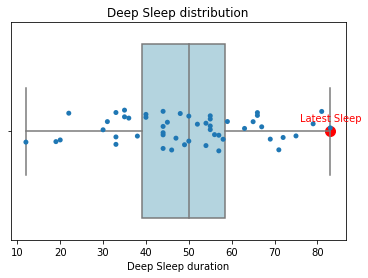

In [108]:
sns.boxplot(df['Deep Sleep duration'], color = 'lightblue')
sns.stripplot(df['Deep Sleep duration'])
plt.title('Deep Sleep distribution')

## ADD THE VERY LAST OBSERVATION 
latest_sleep = df['Deep Sleep duration'].iloc[-1]
plt.scatter(latest_sleep, 0, color='red', s=100)  # s is the size of the point

# Annotate the latest data point
plt.annotate('Latest Sleep', (latest_sleep, 0), textcoords="offset points", xytext=(0,10), ha='center', color='red')

# Time series visualisations

In [24]:
## Data entry error: accidentally keyed in same row twice:
df['Date of night'][df['Date of night'].duplicated()]
df['Date of night'].duplicated()

## Remove the entry 
df = df[~df['Date of night'].duplicated()]

In [25]:
## To allow smoother curves, we will impute for the missing dates
df_full_dates = df.set_index('Date of night').reindex(full_date_range).fillna(0)
df_full_dates.head()

,Timestamp,Sleep quality,Deep Sleep duration,Alcohol,Alcohol hours before bed,Full before bed?,Music while sleeping?,Type of music,Caffiene,Exercise,...,Coffee Type,Other,Amount of sleep,,blackout eye mask?,Melatonin?,REM sleep,Other,day_of_week,Amount of sleep hours
2024-02-26,26/02/2024 20:08:45,Good,59.0,Yes,7.0,No,Yes,,Morning,Football,...,,,07:46:00,,,,,,Mon,7.766667
2024-02-27,27/02/2024 20:04:17,Bad,19.0,None,0.0,Yes,Yes,Sleep classical,Morning,Gym,...,,,07:17:00,,,,,,Tue,7.283333
2024-02-28,28/02/2024 08:20:33,Good,54.0,None,0.0,No,Yes,Binaural beats,Morning,,...,,,08:14:30,,,,,,Wed,8.233333
2024-02-29,29/02/2024 08:13:59,Good,58.0,Yes,2.0,No,Yes,Sleeping jazz,Morning,Football + Gym,...,Half flat white,,09:30:00,,,,,,Thu,9.500000
2024-03-01,01/03/2024 09:07:22,Good,69.0,None,0.0,No,Yes,Binaural,Morning,,...,Half flat white,,07:40:30,,,,,,Fri,7.666667


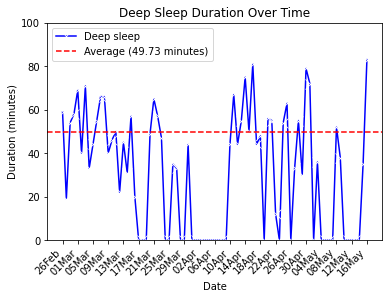

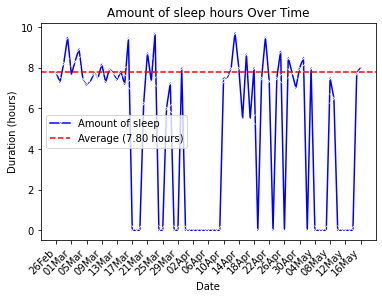

In [26]:
## Plot time series for deep sleep
sns.lineplot(x = df_full_dates.index, y = df_full_dates['Deep Sleep duration'], 
             marker='x', markersize = 10, color = 'b', label = 'Deep sleep')
plt.ylim(0, 100)
plt.title("Deep Sleep Duration Over Time")
plt.xlabel("Date")
plt.ylabel("Duration (minutes)")
plt.xticks(df_full_dates.index[::4], ##interval for tick markers -- only choose every 4 days 
           df_full_dates.index[::4].strftime('%d%b'), ##label for tick markers 
           rotation=45, ha='right')

## Plot horizontal line for average deep sleep
average_deep_sleep = df_full_dates['Deep Sleep duration'].replace(0, float('nan')).mean()
plt.axhline(y = average_deep_sleep, color = 'r', linestyle = '--', label = f'Average ({average_deep_sleep:.2f} minutes)')

plt.legend()
plt.show()

##########
##########
##########
## Plot time series for total sleep
sns.lineplot(x = df_full_dates.index, y = df_full_dates['Amount of sleep hours'], 
             marker='x', markersize = 10, color = 'b', label = 'Amount of sleep')
plt.title("Amount of sleep hours Over Time")
plt.xlabel("Date")
plt.ylabel("Duration (hours)")
plt.xticks(df_full_dates.index[::4], ##interval for tick markers -- only choose every 4 days 
           df_full_dates.index[::4].strftime('%d%b'), ##label for tick markers 
           rotation=45, ha='right')

## Plot horizontal line for average deep sleep
average_sleep = df_full_dates['Amount of sleep hours'].replace(0, float('nan')).mean()
plt.axhline(y = average_sleep, color = 'r', linestyle = '--', label = f'Average ({average_sleep:.2f} hours)')

plt.legend()
plt.show()



## Weekly seasonality 

<Figure size 720x432 with 0 Axes>

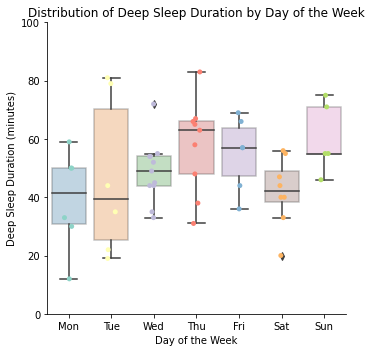

In [27]:
# Extract the day of the week (0 = Monday, 6 = Sunday)
df_full_dates['Day of Week'] = df_full_dates.index.dayofweek

# Drop the 0 values
df_full_dates_no_0s = df_full_dates[df_full_dates['Deep Sleep duration']!= 0]

# Create a boxplot to show the distribution of deep sleep duration for each day
plt.figure(figsize=(10, 6))
sns.catplot(x='Day of Week', y='Deep Sleep duration', data=df_full_dates_no_0s, palette='Set3')
sns.boxplot(x='Day of Week', y='Deep Sleep duration', data=df_full_dates_no_0s,  boxprops=dict(alpha=.3))

plt.ylim(0,100)
plt.xlabel("Day of the Week")
plt.ylabel("Deep Sleep Duration (minutes)")
plt.title("Distribution of Deep Sleep Duration by Day of the Week")
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Show the plot
plt.tight_layout()
plt.show()

A very interesting pattern emerges: Sunday - Monday gives me the worst sleep, but this slowly improves over the week, reaching relatively high deep sleep on Saturday - Sunday.

This could be tied to work stress, or the anticipation of work. It could also reflect the seasonality of moods, which stereotypically hit a low after Sunday ('Monday blues'), but improves over the week.

We run a quantitative test to see if there is a significant difference:

Using the **Kruskal Wallis H Test**. From [Wikipedia](https://en.wikipedia.org/wiki/Kruskal%E2%80%93Wallis_test):

* *The Kruskal–Wallis test by ranks, Kruskal–Wallis test[1] (named after William Kruskal and W. Allen Wallis), or one-way ANOVA on ranks[1] is a non-parametric method for testing whether samples originate from the same distribution.[2][3][4] It is used for comparing two or more independent samples of equal or different sample sizes. It extends the Mann–Whitney U test, which is used for comparing only two groups. The parametric equivalent of the Kruskal–Wallis test is the one-way analysis of variance (ANOVA).*

In [28]:
import scipy.stats as stats

kruskal_result_day_deep_sleep = stats.kruskal(
    df_full_dates[df_full_dates['day_of_week'] == 'Mon']['Deep Sleep duration'],
    df_full_dates[df_full_dates['day_of_week'] == 'Tue']['Deep Sleep duration'],
    df_full_dates[df_full_dates['day_of_week'] == 'Wed']['Deep Sleep duration'],
    df_full_dates[df_full_dates['day_of_week'] == 'Thu']['Deep Sleep duration'],
    df_full_dates[df_full_dates['day_of_week'] == 'Fri']['Deep Sleep duration'],
    df_full_dates[df_full_dates['day_of_week'] == 'Sat']['Deep Sleep duration'],
    df_full_dates[df_full_dates['day_of_week'] == 'Sun']['Deep Sleep duration']
)

print("Kruskal-Wallis H Test result:", kruskal_result_day_deep_sleep)

Kruskal-Wallis H Test result: KruskalResult(statistic=9.844336096687638, pvalue=0.1313622867129213)


Based on the results, it looks like the sample size is still too small to get any significance, despite the visual appearance

# Bivariate relationships 

## Relationship between deep sleep and perceived quality

In [29]:
# !pip install joypy
import joypy 
from matplotlib import cm


/Users/iantan/opt/anaconda3/lib/python3.9/site-packages/joypy/joyplot.py:435: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  fig, axes = _subplots(naxes=num_axes, ax=ax, squeeze=False,


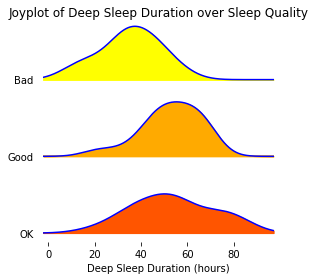

In [44]:
fig, ax = plt.subplots(figsize=(4, 4))
joyplot = joypy.joyplot(df, by='Sleep quality', column='Deep Sleep duration', 
                         kind='kde', fill=True, linecolor="blue", ax=ax, colormap=cm.autumn_r)

# Add titles and labels
plt.title('Joyplot of Deep Sleep Duration over Sleep Quality')
plt.xlabel('Deep Sleep Duration (hours)')
plt.ylabel('Sleep Quality')

plt.tight_layout()
plt.show()

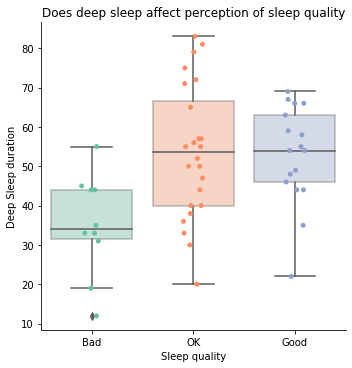

In [31]:
sns.catplot(y='Deep Sleep duration', data=df, x='Sleep quality', palette='Set2',
            order = ['Bad', 'OK', 'Good'])
sns.boxplot(y='Deep Sleep duration', data=df, x='Sleep quality', palette='Set2',
            order = ['Bad', 'OK', 'Good'], boxprops = dict(alpha = 0.4))
plt.title('Does deep sleep affect perception of sleep quality')
plt.show()

If we treat the Sleep Quality as ordinal, we can see if there is a correlation. 

Specifically, we can see the spearman correlation and get its statistical significance.



In [41]:
df['Sleep quality ordinal'] = df['Sleep quality'].map({'Bad': 0, 'OK': 1, 'Good':2})

# Get correlation coefficient and the associated p value
spearman_corr, p_value = stats.spearmanr(df['Sleep quality'], df['Deep Sleep duration'])
print(f"Spearman correlation: {spearman_corr:.2f}, P-value:, {p_value:.2f}")

pearson, p_value = stats.pearsonr(df['Sleep quality ordinal'], df['Deep Sleep duration'])
print(f"Pearson correlation:, {pearson:.2f}, P-value:, {p_value:.2f}")


Spearman correlation: 0.33, P-value:, 0.02
Pearson correlation:, 0.34, P-value:, 0.01


We can visualise this correlation in a regression plot: 

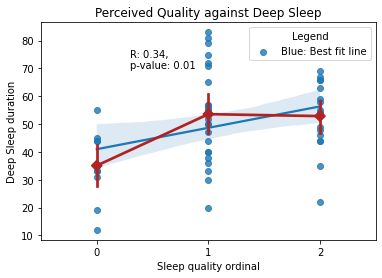

In [119]:
sns.regplot(x = df['Sleep quality ordinal'], y = df['Deep Sleep duration'], label = 'Blue: Best fit line')
sns.pointplot(x = df['Sleep quality ordinal'], y = df['Deep Sleep duration'], estimator=np.mean, size = 20,
              markers='D', color = 'firebrick', label = 'Means')
plt.title('Perceived Quality against Deep Sleep')
plt.text(y = 70,x = 0.3, s = f'R: {pearson:.2f}, \np-value: {p_value:.2f}')
plt.legend(title = 'Legend')
plt.show()


In both metrics, we see a positive correlation. However this may be due to the downward shift of the deep sleep distribution for 'Bad' sleep, while it is hard to distinguish between 'OK' and 'Good'. In fact, the central tendency of the latter two are similar, but 'OK' has a much wider variance

If instead we treat it as nominal categorical (i.e. no inherent order), we can run multiple Mann Whitney pairwise tests, taking into the higher type 1 error due to multiple testing.

In [45]:
def pairwise_wilcoxon(group1, group2):
    group1_data = df[df['Sleep quality'] == group1]['Deep Sleep duration']
    group2_data = df[df['Sleep quality'] == group2]['Deep Sleep duration']
    stat, p = stats.mannwhitneyu(group1_data, group2_data)
    return stat, p

print(f" Good vs Bad {pairwise_wilcoxon('Good', 'Bad')}")
print(f" Good vs OK {pairwise_wilcoxon('Good', 'OK')}")
print(f" Bad vs OK {pairwise_wilcoxon('Bad', 'OK')}")


 Good vs Bad (146.0, 0.0023294203884646103)
 Good vs OK (205.0, 0.9894371937518622)
 Bad vs OK (46.0, 0.005415373119780607)


As we can see, 'Good' and 'Bad' sleep are indistinguishable currently simply by looking at deep sleep amount.

It is likely that sleep perception is influenced not only by deep sleep, but also having a good balance of the other sleep stages, such as REM sleep, that we are not looking at in this mini study.

# Exercise and calories

Currently, my main form of exercise are: walks, football and gym. I love to keep fit, and find myself frequently exercising everyday. 

Research shows that exercise may be able to aid in non-REM, slow wave sleep. However the exact mechanism remains [unknown](https://www.hopkinsmedicine.org/health/wellness-and-prevention/exercising-for-better-sleep#:~:text=However%2C%20we%20do%20know%20that,have%20a%20chance%20to%20rejuvenate.) and the effects of particular types of exercise, such as anaerobic or weight lifting, has yet to established.  

## Types of exercise and calories burnt

In [36]:
df['Exercise'] = df['Exercise'].fillna('None')
df['Exercise'] = df['Exercise'].apply(lambda x: 'None' if x == '' else x)
df['Exercise'] = df['Exercise'].apply(lambda x: 'Football + Gym' if x.strip() == 'Both' else x)
df['Exercise'].value_counts()

Gym               22
Football          14
None              11
Football + Gym     3
Swim               1
Name: Exercise, dtype: int64

We can see how much calories are burnt with the different types of exercises. 

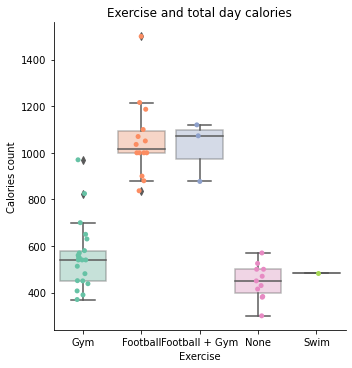

In [49]:
sns.catplot(y='Calories count', data=df, x='Exercise', palette='Set2', order = ['Gym', 'Football', 'Football + Gym', 'None','Swim'])
sns.boxplot(y='Calories count', data=df, x='Exercise', palette='Set2', boxprops = dict(alpha = 0.4), order = ['Gym', 'Football', 'Football + Gym', 'None','Swim'])
plt.title('Exercise and total day calories')
plt.show()

In [70]:
pd.DataFrame({'Mean cals': df.groupby('Exercise')['Calories count'].mean().values, 
              'Std' : df.groupby('Exercise')['Calories count'].std().values,
              'Count' : df.groupby('Exercise')['Timestamp'].count()},
              index=df.groupby('Exercise').sum().index).round(2)


,Mean cals,Std,Count
Exercise,,,
Football,1055.50,166.01,14
Football + Gym,1023.33,128.89,3
Gym,557.38,142.90,22
None,447.55,76.73,11
Swim,485.00,NaN,1


Football burns the most calories, and interestingly days that I do both football and gym on average burn me less calories. Gym days burn about 100 kcals more than no exercise days.

## Calories on deep sleep

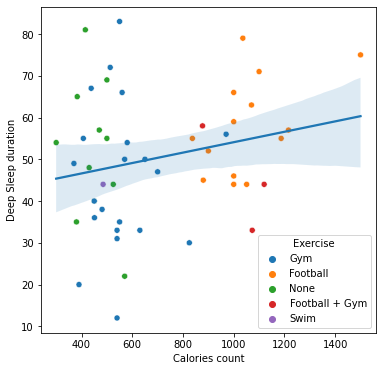

In [39]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(data = df, y = 'Deep Sleep duration', x = 'Calories count', hue = 'Exercise')
sns.regplot(data = df, y = 'Deep Sleep duration', x = 'Calories count', scatter = False)
plt.show()

In [40]:
calories_ds_pearson, calories_ds_pearson_pval = stats.pearsonr(df['Deep Sleep duration'], df['Calories count'].fillna(df['Calories count'].mean()))
print(f'Correlation coeff {calories_ds_pearson:.2f}, p-value {calories_ds_pearson_pval:.2f}')

Correlation coeff 0.22, p-value 0.12


To quantify the effect on sleep, assuming no omitted variable bias, we can perform a linear regression of deep sleep on calories. 

In [80]:
import statsmodels.api as sm

sub_df = df[['Deep Sleep duration', 'Calories count']].dropna(axis =0)
Y = sub_df['Deep Sleep duration']
X = sub_df['Calories count']/100 ## define X: 1 unit of X = 100 kcal
print(Y.shape, X.shape)
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

(50,) (50,)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Deep Sleep duration   R-squared:                       0.052
Model:                             OLS   Adj. R-squared:                  0.032
Method:                  Least Squares   F-statistic:                     2.613
Date:                 Sat, 18 May 2024   Prob (F-statistic):              0.113
Time:                         17:01:06   Log-Likelihood:                -207.43
No. Observations:                   50   AIC:                             418.9
Df Residuals:                       48   BIC:                             422.7
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             41.6241      5.828      7.142      0.000      29.907      53.342
Calories count     1.2465      0.771      1.617      0.113      -0.304       2.797
==============================================================================
Omnibus:                        0.118   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.943   Jarque-Bera (JB):                0.162
Skew:                           0.103   Prob(JB):                        0.922
Kurtosis:                       2.813   Cond. No.                         20.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

With X as every 100 kcal burnt, we get the coefficient: 1.24, i.e.
*for every 100kcal burnt --> 1.2 mins of deep sleep gained*

The p value is not small at 10%, suggesting insufficient evidence at the moment to show that there is an effect of exercise on deep sleep. 

# Effect of gaming past 10

In [88]:
df['Game'] = df['Game'].replace('', 'None').str.strip()
df['Game past 10pm'] = df.Game.apply(lambda x: x != "None")
df['Game past 10pm'].value_counts()

False    41
True     10
Name: Game past 10pm, dtype: int64

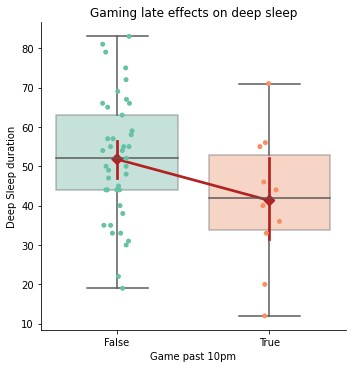

In [97]:
sns.catplot(y='Deep Sleep duration', data=df, x='Game past 10pm', palette='Set2')
sns.boxplot(y='Deep Sleep duration', data=df, x='Game past 10pm', palette='Set2', boxprops = dict(alpha = 0.4))
plt.title('Gaming late effects on deep sleep')
sns.pointplot(y='Deep Sleep duration', data=df, x='Game past 10pm', estimator=np.mean, 
              color='firebrick', size = 20, markers='D')
plt.show()

In [114]:
sub_df = df[['Deep Sleep duration', 'Game past 10pm']].dropna(axis =0)
sub_df['Game past 10pm'] = sub_df['Game past 10pm'].map({True:1, False:0})
Y = sub_df['Deep Sleep duration']
X = sub_df['Game past 10pm'] ## define X: 1 unit of X = 100 kcal
print(Y.shape, X.shape)
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

(51,) (51,)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Deep Sleep duration   R-squared:                       0.066
Model:                             OLS   Adj. R-squared:                  0.047
Method:                  Least Squares   F-statistic:                     3.471
Date:                 Sat, 18 May 2024   Prob (F-statistic):             0.0685
Time:                         17:38:25   Log-Likelihood:                -212.59
No. Observations:                   51   AIC:                             429.2
Df Residuals:                       49   BIC:                             433.0
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             51.7805      2.491     20.786      0.000      46.774      56.787
Game past 10pm   -10.4805      5.626     -1.863      0.068     -21.786       0.825
==============================================================================
Omnibus:                        0.385   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.825   Jarque-Bera (JB):                0.543
Skew:                           0.009   Prob(JB):                        0.762
Kurtosis:                       2.495   Cond. No.                         2.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

There is strong evidence here that gaming past 10pm decreases deep sleep, as seen by the p value of 6%. 
Assuming no type 1 error, gaming past 10pm has the effect of lowering deep sleep by 10 mins, which is very significant. 